Description for which files are where, what is needed

### What you need

This tutorial goes from parsing data to visualizing the posterior of MDSINE2.

The tables that you will need are:
* taxa counts
* qPCR table
* perturbations table
* taxonomy table
* metadata file

Our data is preprocessed in objects from a previous tutorial. For this tutorial we unpacking our data into it's composite tables to walk you through constructing your own `Study` objects


In [2]:
%matplotlib inline

import mdsine2 as md2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import logging

md2.LoggingConfig(level=logging.INFO)

In [3]:
# Make example datasets from preprocessed data
def make_toy(dset):
    to_delete = []
    for taxa in dset.taxas:
        if taxa.idx >= 15:
            to_delete.append(taxa.name)
    dset.pop_taxas(to_delete)
    
    os.makedirs(os.path.join('data',dset.name+'-toy'), exist_ok=True)
    dset.write_metadata_to_csv(path=os.path.join('data',dset.name+'-toy','metadata.tsv'))
    dset.write_qpcr_to_csv(path=os.path.join('data',dset.name+'-toy','qpcr.tsv'))
    if dset.perturbations is not None:
        dset.write_perturbations_to_csv(path=os.path.join('data',dset.name+'-toy','perturbations.tsv'))
    dset.write_reads_to_csv(path=os.path.join('data',dset.name+'-toy','reads.tsv'))
    dset.taxas.write_taxonomy_to_csv(path=os.path.join('data',dset.name+'-toy','taxonomy.tsv'))

In [4]:
healthy = md2.Study.load('../processed_data/gibson_healthy_agg_taxa_filtered.pkl')
uc = md2.Study.load('../processed_data/gibson_uc_agg_taxa_filtered.pkl')
replicates = md2.Study.load('../processed_data/gibson_replicates_agg_taxa_filtered.pkl')

make_toy(dset=healthy)
make_toy(dset=uc)
make_toy(dset=replicates)

### Metadata table
The following table is a metadata table. It tells the `Study` object what subject and timepoint each sample belongs to

In [5]:
# Load metadata table
metadata = pd.read_csv('data/healthy-toy/metadata.tsv', sep='\t')
metadata.head()

,sampleID,subject,time
0,2-D10,2,10.0
1,2-D11,2,11.0
2,2-D14,2,14.0
3,2-D16,2,16.0
4,2-D18,2,18.0


### qPCR table
The following table is a qPCR table. This has the replicate measurements of the qPCR for every sample.

In [6]:
# qPCR table
qpcr = pd.read_csv('data/healthy-toy/qpcr.tsv', sep='\t')
qpcr.head()

,sampleID,measurement1,measurement2,measurement3
0,2-D10,4.129004e+10,6.423568e+10,8.384557e+10
1,2-D11,2.981363e+10,6.587538e+10,5.077812e+10
2,2-D14,1.647771e+10,7.104907e+10,2.498869e+10
3,2-D16,3.666487e+10,6.237899e+10,3.875999e+10
4,2-D18,4.523257e+10,2.320504e+10,2.330249e+10


### Perturbation table
The following table is a perturbation table. This tells the `Study` object which subject has a perturbation and when. There can be multiple perturbations for each subject. Note that this is only necessary if you have perturbations in your dataset.

In [7]:
perturbations = pd.read_csv('data/healthy-toy/perturbations.tsv', sep='\t')
perturbations

,name,start,end,subject
0,High Fat Diet,21.5,28.5,2
1,High Fat Diet,21.5,28.5,3
2,High Fat Diet,21.5,28.5,4
3,High Fat Diet,21.5,28.5,5
4,Vancomycin,35.5,42.5,2
5,Vancomycin,35.5,42.5,3
6,Vancomycin,35.5,42.5,4
7,Vancomycin,35.5,42.5,5
8,Gentamicin,50.5,57.5,2
9,Gentamicin,50.5,57.5,3


### Reads table
The following table is a reads table. This shows the number of counts each taxa has for each sample ID.

In [8]:
reads = pd.read_csv('data/healthy-toy/reads.tsv', sep='\t')
reads.head()

,name,2-D10,2-D11,2-D14,2-D16,2-D18,2-D1AM,2-D1PM,2-D21AM,2-D21PM,2-D22AM,2-D22PM,2-D23AM,2-D23PM,2-D24,2-D25,2-D28AM,2-D28PM,2-D29AM,2-D29PM,2-D2AM,2-D2PM,2-D30AM,2-D30PM,2-D31AM,2-D31PM,2-D32,2-D33,2-D35AM,2-D35PM,2-D36AM,2-D36PM,2-D37AM,2-D37PM,2-D38,2-D39,2-D3AM,2-D3PM,2-D42AM,2-D42PM,2-D43AM,2-D43PM,2-D44AM,2-D44PM,2-D45AM,2-D45PM,2-D46,2-D47,2-D4AM,2-D4PM,2-D5,2-D50AM,2-D50PM,2-D51AM,2-D51PM,2-D52AM,2-D52PM,2-D53,2-D54,2-D57AM,2-D57PM,2-D58AM,2-D58PM,2-D59AM,2-D59PM,2-D6,2-D60AM,2-D60PM,2-D61,2-D62,2-D63,2-D64AM,2-D64PM,2-D7,2-D8,2-D9,3-D10,3-D11,3-D14,3-D16,3-D18,3-D1AM,3-D1PM,3-D21AM,3-D21PM,3-D22AM,3-D22PM,3-D23AM,3-D23PM,3-D24,3-D25,3-D28AM,3-D29AM,3-D29PM,3-D2AM,3-D2PM,3-D30AM,3-D30PM,3-D31AM,3-D31PM,3-D32,3-D33,3-D35AM,3-D35PM,3-D36AM,3-D36PM,3-D37AM,3-D38,3-D39,3-D3AM,3-D3PM,3-D42AM,3-D42PM,3-D43AM,3-D43PM,3-D44AM,3-D44PM,3-D45AM,3-D45PM,3-D46,3-D47,3-D4AM,3-D4PM,3-D5,3-D50AM,3-D50PM,3-D51AM,3-D51PM,3-D52AM,3-D52PM,3-D53,3-D54,3-D57AM,3-D57PM,3-D58AM,3-D58PM,3-D59AM,3-D59PM,3-D6,3-D60AM,3-D60PM,3-D61,3-D62,3-D63,3-D64AM,3-D64PM,3-D7,3-D8,3-D9,4-D10,4-D11,4-D14,4-D16,4-D18,4-D1AM,4-D1PM,4-D21AM,4-D21PM,4-D22AM,4-D22PM,4-D23AM,4-D23PM,4-D24,4-D25,4-D28AM,4-D29AM,4-D29PM,4-D2AM,4-D2PM,4-D30AM,4-D30PM,4-D31AM,4-D31PM,4-D32,4-D33,4-D35AM,4-D35PM,4-D36AM,4-D36PM,4-D37AM,4-D37PM,4-D38,4-D39,4-D3AM,4-D3PM,4-D42AM,4-D42PM,4-D43AM,4-D43PM,4-D44AM,4-D44PM,4-D45AM,4-D45PM,4-D46,4-D47,4-D4AM,4-D4PM,4-D5,4-D50AM,4-D50PM,4-D51AM,4-D51PM,4-D52AM,4-D52PM,4-D53,4-D54,4-D57AM,4-D57PM,4-D58AM,4-D58PM,4-D59AM,4-D59PM,4-D6,4-D60AM,4-D60PM,4-D61,4-D62,4-D63,4-D64AM,4-D64PM,4-D7,4-D8,4-D9,5-D10,5-D11,5-D14,5-D16,5-D18,5-D1AM,5-D1PM,5-D21AM,5-D21PM,5-D22AM,5-D22PM,5-D23AM,5-D23PM,5-D24,5-D25,5-D28AM,5-D28PM,5-D29AM,5-D29PM,5-D2AM,5-D2PM,5-D30AM,5-D30PM,5-D31AM,5-D31PM,5-D32,5-D33,5-D35AM,5-D35PM,5-D36AM,5-D36PM,5-D37AM,5-D37PM,5-D38,5-D39,5-D3AM,5-D3PM,5-D42AM,5-D42PM,5-D43AM,5-D43PM,5-D44AM,5-D44PM,5-D45AM,5-D45PM,5-D46,5-D47,5-D4AM,5-D4PM,5-D5,5-D50AM,5-D50PM,5-D51AM,5-D51PM,5-D52AM,5-D52PM,5-D53,5-D54,5-D57AM,5-D57PM,5-D58AM,5-D58PM,5-D59AM,5-D59PM,5-D6,5-D60AM,5-D60PM,5-D61,5-D62,5-D63,5-D64AM,5-D64PM,5-D7,5-D8,5-D9
0,OTU_1,1227,1793,8023,9503,3243,1830,199,3539,5270,3866,3899,1984,807,2299,1349,1074,855,3479,3910,489,1056,5113,5624,7096,5788,10237,2784,2711,2421,1554,1216,259,154,114,100,1474,3227,1963,2950,126,202,207,222,89,50,185,180,7637,4237,5597,53,47,29,48,162,37,188,2349,5520,3265,3892,3881,1646,1805,6129,1913,6688,1730,1269,651,987,853,9591,2503,234,6265,6822,1831,2874,6154,235,202,7102,7624,6024,3889,4683,5921,3608,4278,2865,5330,7488,340,227,7926,5061,5108,4923,4988,5879,4039,4822,3009,4213,609,197,123,1398,1945,1365,1652,4512,741,455,461,99,54,386,134,4408,4276,2734,124,209,55,80,249,107,341,109,168,194,713,637,539,564,3804,806,891,833,775,545,525,845,4798,4650,5987,398,1744,11041,9437,9948,4695,195,5562,3920,1638,1210,1235,639,929,1277,4084,5681,6144,222,176,4690,3737,5519,5504,3350,6638,3696,3697,1529,2179,3757,1466,182,96,183,461,8678,7682,5384,2311,1032,1101,263,153,426,167,1900,2509,3240,157,182,71,59,267,154,133,109,116,36,122,90,20,13,6844,125,63,96,63,51,34,76,5459,3853,585,5152,4173,11816,5113,5642,5033,230,6454,5745,4194,7218,8262,1512,2093,3224,2091,1650,3840,11932,620,852,8741,5593,6152,3740,500,307,52,77,99,95,182,135,135,123,1198,3491,395,38,60,35,96,136,38,27,137,162,3943,5485,5746,49,103,39,80,222,205,115,29,73,135,140,223,83,192,6401,218,409,2072,1160,723,1043,1732,4698,3310,4495
1,OTU_2,17362,6887,17165,29854,36759,2929,9880,15863,20619,2725,1792,466,51,86,38,25,34,1317,2217,24422,17184,5490,5924,6906,7466,9783,7856,10490,9939,18164,17769,16694,8553,8842,5806,11193,15984,8567,6995,5108,6693,5785,6963,5880,6755,8239,7199,21915,13035,15798,625,751,2368,2556,632,206,278,177,644,1857,5473,5433,2847,2693,14811,2652,8942,3765,4053,2497,4608,4569,12926,8541,12646,11800,14693,20597,10165,19883,8032,19079,24905,21860,2601,1059,309,152,130,124,46,1130,3653,23489,17698,9339,7694,7429,8762,9965,15319,9470,13328,1292

### Taxonomy table
The following table is a taxonomy table. For each taxa name, it shows the sequence and taxonomy

In [9]:
taxonomy = pd.read_csv('data/healthy-toy/taxonomy.tsv', sep='\t')
taxonomy

,name,sequence,kingdom,phylum,class,order,family,genus,species
0,OTU_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,NaN
1,OTU_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/ovatus
2,OTU_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
3,OTU_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
4,OTU_5,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Parasutterella,excrementihominis
5,OTU_6,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/dorei
6,OTU_7,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,caccae
7,OTU_8,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,salyersiae
8,OTU_9,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
9,OTU_10,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,uniformis


With these 5 tables, you can run our model. You can parse them directly into a `Study` object with the `mdsine2.dataset.parse` command:

In [13]:
h_toy = md2.dataset.parse(name='healthy-toy-dataset', 
                         taxonomy='data/healthy-toy/taxonomy.tsv', 
                         reads='data/healthy-toy/reads.tsv', 
                         qpcr='data/healthy-toy/qpcr.tsv', 
                         perturbations='data/healthy-toy/perturbations.tsv', 
                         metadata='data/healthy-toy/metadata.tsv')
uc_toy = md2.dataset.parse(name='uc-toy-dataset', 
                         taxonomy='data/uc-toy/taxonomy.tsv', 
                         reads='data/uc-toy/reads.tsv', 
                         qpcr='data/uc-toy/qpcr.tsv', 
                         perturbations='data/uc-toy/perturbations.tsv', 
                         metadata='data/uc-toy/metadata.tsv')
rep_toy = md2.dataset.parse(name='replicates-toy-dataset', 
                         taxonomy='data/replicates-toy/taxonomy.tsv', 
                         reads='data/replicates-toy/reads.tsv', 
                         qpcr='data/replicates-toy/qpcr.tsv', 
                         metadata='data/replicates-toy/metadata.tsv')


INFO:base.1117: TaxaSet parsng new taxonomy table. Resetting
INFO:base.1117: TaxaSet parsng new taxonomy table. Resetting
INFO:base.1117: TaxaSet parsng new taxonomy table. Resetting


          measurement1  measurement2  measurement3
sampleID                                          
2-D10     4.129004e+10  6.423568e+10  8.384557e+10
2-D11     2.981363e+10  6.587538e+10  5.077812e+10
2-D14     1.647771e+10  7.104907e+10  2.498869e+10
2-D16     3.666487e+10  6.237899e+10  3.875999e+10
2-D18     4.523257e+10  2.320504e+10  2.330249e+10
...                ...           ...           ...
5-D64AM   6.186436e+10  1.176180e+11  1.133922e+11
5-D64PM   5.640167e+10  1.124173e+11  1.155695e+11
5-D7      5.851029e+10  7.881031e+10  3.539782e+10
5-D8      2.451619e+10  5.473670e+10  5.284428e+10
5-D9      5.088652e+10  6.413902e+10  6.621718e+10

[297 rows x 3 columns]
          measurement1  measurement2  measurement3
sampleID                                          
10-D10    1.249714e+11  1.476571e+11  5.866129e+10
10-D11    1.430439e+11  2.154554e+11  2.931997e+11
10-D14    7.274684e+10  1.950943e+11  6.949483e+10
10-D16    9.364484e+10  1.167788e+11  1.107184e+11
10-D18 

You would just read these in with this parser. These are identical to our precomputed dataset 

# Learning the Negative Binomial dispersion parameters

This corresponds to the script ``

words here

In [14]:
# Description

In [15]:
params = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    ckpt=100, basepath='output/negbin')

description

In [16]:
mcmc_negbin = md2.negbin.build_graph(params=params, graph_name=rep_toy.name, 
                              subjset=rep_toy)

INFO:inference.548: Setting Single Write, Multiple Read Mode
INFO:inference.553: Setting the trace of learned parameters
INFO:inference.554: #######################################
INFO:inference.556: Setting the trace of Negative binomial dispersion a0
INFO:inference.556: Setting the trace of Negative binomial dispersion a1
INFO:inference.556: Setting the trace of Filtering
INFO:inference.558: Setting the trace for diagnostic variables
INFO:inference.559: ##########################################


description

In [17]:
mcmc_negbin = md2.negbin.run_graph(mcmc_negbin, crash_if_error=True)

INFO:inference.427: 

Inference iteration 0/200, time: 0.0
INFO:inference.436: Negative binomial dispersion a0: 1e-10
INFO:inference.436: Negative binomial dispersion a1: 0.1
INFO:inference.436: Filtering: NA
INFO:inference.427: 

Inference iteration 1/200, time: 0.34099864959716797
INFO:inference.436: Negative binomial dispersion a0: Value: 9.12347176492168e-11, Acceptance rate: 1.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.1, Acceptance rate: 0.0
INFO:inference.436: Filtering: no-mp : Time: 0.0300, Acc: [0.333, 0.267, 0.533], data/sec: 1500.05
INFO:inference.427: 

Inference iteration 2/200, time: 0.0059931278228759766
INFO:inference.436: Negative binomial dispersion a0: Value: 9.12347176492168e-11, Acceptance rate: 0.5
INFO:inference.436: Negative binomial dispersion a1: Value: 0.1, Acceptance rate: 0.0
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.333, 0.667], data/sec: 14953.55
INFO:inference.427: 

Inference iteration 3/200, time: 0.00701

INFO:inference.436: Negative binomial dispersion a0: Value: 2.957768293105539e-11, Acceptance rate: 0.5238095238095238
INFO:inference.436: Negative binomial dispersion a1: Value: 0.0702435881532771, Acceptance rate: 0.5714285714285714
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.400, 0.267], data/sec: 15007.05
INFO:inference.427: 

Inference iteration 22/200, time: 0.005998373031616211
INFO:inference.436: Negative binomial dispersion a0: Value: 2.957768293105539e-11, Acceptance rate: 0.5
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07518623197685229, Acceptance rate: 0.5909090909090909
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.333, 0.467], data/sec: 15002.28
INFO:inference.427: 

Inference iteration 23/200, time: 0.006000041961669922
INFO:inference.436: Negative binomial dispersion a0: Value: 2.957768293105539e-11, Acceptance rate: 0.4782608695652174
INFO:inference.436: Negative binomial dispersion a1: Value: 0.084650640

INFO:inference.436: Negative binomial dispersion a1: Value: 0.05972808680826823, Acceptance rate: 0.7560975609756098
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.333, 0.467], data/sec: 15002.28
INFO:inference.427: 

Inference iteration 42/200, time: 0.007999181747436523
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.35714285714285715
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07256198093375534, Acceptance rate: 0.7619047619047619
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.200, 0.467, 0.400], data/sec: 15009.44
INFO:inference.427: 

Inference iteration 43/200, time: 0.008000612258911133
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.3488372093023256
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07256198093375534, Acceptance rate: 0.7441860465116279
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc

INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.16
INFO:inference.436: Negative binomial dispersion a1: Value: 0.06843561847362963, Acceptance rate: 0.72
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.200, 0.333], data/sec: 14998.70
INFO:inference.427: 

Inference iteration 63/200, time: 0.006000041961669922
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.14
INFO:inference.436: Negative binomial dispersion a1: Value: 0.06621845898933494, Acceptance rate: 0.74
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.267, 0.333, 0.467], data/sec: 15001.09
INFO:inference.427: 

Inference iteration 64/200, time: 0.00599980354309082
INFO:inference.436: Negative binomial dispersion a0: Value: 5.576405282825899e-13, Acceptance rate: 0.12
INFO:inference.436: Negative binomial dispersion a1: Value: 0.06621845898933494, Acceptance rate: 0.74
INFO:inference.436: Fil

INFO:inference.436: Negative binomial dispersion a1: Value: 0.07077472062567301, Acceptance rate: 0.62
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.467, 0.600], data/sec: 15004.66
INFO:inference.427: 

Inference iteration 84/200, time: 0.005001068115234375
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.06
INFO:inference.436: Negative binomial dispersion a1: Value: 0.07077472062567301, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0020, Acc: [0.400, 0.333, 0.533], data/sec: 22493.59
INFO:inference.427: 

Inference iteration 85/200, time: 0.006000518798828125
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.06
INFO:inference.436: Negative binomial dispersion a1: Value: 0.05456268907748136, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.333, 0.467], data/sec: 15008.24
INFO:inference.427: 

Infer

INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.333, 0.333], data/sec: 15026.17
INFO:inference.427: 

Inference iteration 105/200, time: 0.00599980354309082
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.05223443213278448, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.467, 0.200], data/sec: 15004.66
INFO:inference.427: 

Inference iteration 106/200, time: 0.009998083114624023
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.05223443213278448, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.333, 0.533], data/sec: 14998.70
INFO:inference.427: 

Inference iteration 107/200, time: 0.004999876022338867
INFO:inference.436: Negative binomial dispersion 

INFO:inference.427: 

Inference iteration 126/200, time: 0.005998849868774414
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.051348223155991454, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.533, 0.267], data/sec: 15007.05
INFO:inference.427: 

Inference iteration 127/200, time: 0.005999326705932617
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial dispersion a1: Value: 0.051348223155991454, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.400, 0.533, 0.267], data/sec: 15007.05
INFO:inference.427: 

Inference iteration 128/200, time: 0.00700068473815918
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.02
INFO:inference.436: Negative binomial disp

INFO:inference.436: Negative binomial dispersion a1: Value: 0.054363890123405326, Acceptance rate: 0.6
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.400, 0.333], data/sec: 15004.66
INFO:inference.427: 

Inference iteration 148/200, time: 0.006999969482421875
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.054363890123405326, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0040, Acc: [0.467, 0.333, 0.333], data/sec: 11266.93
INFO:inference.427: 

Inference iteration 149/200, time: 0.007001161575317383
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.054363890123405326, Acceptance rate: 0.56
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.200, 0.400, 0.600], data/sec: 14997.51
INFO:inference.427: 

I

INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.600, 0.267, 0.333], data/sec: 14999.90
INFO:inference.427: 

Inference iteration 169/200, time: 0.00599980354309082
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.08093076178190899, Acceptance rate: 0.58
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.467, 0.267, 0.400], data/sec: 15003.47
INFO:inference.427: 

Inference iteration 170/200, time: 0.007999897003173828
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.08093076178190899, Acceptance rate: 0.56
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.533, 0.467, 0.600], data/sec: 15009.44
INFO:inference.427: 

Inference iteration 171/200, time: 0.0060002803802490234
INFO:inference.436: Negative binomial dispersion a

INFO:inference.427: 

Inference iteration 190/200, time: 0.0060002803802490234
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.060860136182739916, Acceptance rate: 0.5
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.333, 0.267, 0.400], data/sec: 14999.90
INFO:inference.427: 

Inference iteration 191/200, time: 0.005999565124511719
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispersion a1: Value: 0.060860136182739916, Acceptance rate: 0.48
INFO:inference.436: Filtering: no-mp : Time: 0.0030, Acc: [0.600, 0.400, 0.533], data/sec: 15002.28
INFO:inference.427: 

Inference iteration 192/200, time: 0.006999015808105469
INFO:inference.436: Negative binomial dispersion a0: Value: 1.3958547816432408e-13, Acceptance rate: 0.0
INFO:inference.436: Negative binomial dispe

description, we are repeating this on the smaller dataset so you know how to run it and know what it looks like. This is not representative of the real results because we only have the ten most abundant taxa here.

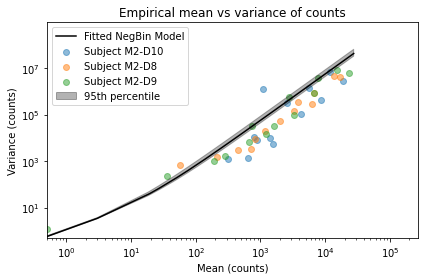

In [18]:
fig = md2.negbin.visualize_learned_negative_binomial_model(mcmc_negbin)
fig.tight_layout()

# Run the model

In [19]:
# Get a0 and a1 from negbin (get the mean of the posterior)
from mdsine2.names import STRNAMES
a0 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0])['mean']
a1 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1])['mean']

basepath = 'output/mdsine2'
os.makedirs(basepath, exist_ok=True)


# Initialize parameters of the model
params = md2.config.MDSINE2ModelConfig(
    basepath=basepath, data_seed=0, init_seed=0,
    burnin=100, n_samples=200, negbin_a0=a0, 
    negbin_a1=a1, checkpoint=100)

# The default number of modules is 30, which is larger than the number of taxa
# that we have in this dataset, which would throw a flag.
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'

In [20]:
# initilize the graph
mcmc_healthy0 = md2.initialize_graph(params=params, graph_name=h_toy.name, subjset=h_toy)


INFO:base.2535: max_value found: 551243918704.4608, scaling_factor: 1.8140789695244354e-10
INFO:run.83: Normalizing abundances for a max value of 100. Normalization constant: 1.8141E-10
INFO:run.250: There are 297 qPCR measurements for 3 buckets. Each bucket is 99 measurements long
INFO:run.285: Initializing Filtering
INFO:posterior.2649: Setting up the essential timepoints
INFO:posterior.2662: Essential timepoints: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   6.   7.   8.   9.  10.  11.  14.  16.  18.  21.  21.5 22.  22.5 23.  23.5 24.  25.  28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  33.  35.  35.5 36.  36.5 37.  37.5 38.  39.  42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  47.  50.  50.5 51.  51.5 52.  52.5 53.  54.  57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  62.  63.  64.  64.5]
INFO:run.285: Initializing Zero inflation
INFO:design_matrices.846: Initializing LHS vector
INFO:design_matrices.1011: Initializing growth design matrix
INFO:design_matrices.939: Initializing self-intera

INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Vancomycin
INFO:run.369: 		value: {2104969397360: 0, 2104969397416: 0, 2104969397752: 0, 2104969397808: 0, 2104969398480: 0, 2104969397080: 0, 2105020084576: 0, 2105020088160: 0, 2105020048552: 0, 2104974596080: 0, 2104974594456: 0, 2104974598096: 0, 2104974597032: 0, 2105021486752: 0, 2104969550200: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.368: 	perturbation Gentamicin
INFO:run.369: 		value: {2104969397360: 0, 2104969397416: 0, 2104969397752: 0, 2104969397808: 0, 2104969398480: 0, 2104969397080: 0, 2105020084576: 0, 2105020088160: 0, 2105020048552: 0, 2104974596080: 0, 2104974594456: 0, 2104974598096: 0, 2104974597032: 0, 2105021486752: 0, 2104969550200: 0}
INFO:run.370: 		prior.loc: 0
INFO:run.371: Perturbation prior variances:
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:run.374: 		scale: 2000.0
INFO:run.375: 		value: 10000.0
INFO:run.373: 		dof: 2.5
INFO:r

In [ ]:
mcmc_healthy0 = md2.run_graph(mcmc_healthy0, crash_if_error=True)

INFO:inference.427: 

Inference iteration 0/200, time: 0.0
INFO:inference.436: Cluster interaction indicator parameter: None
INFO:inference.436: Cluster interaction probability: 0.09234190994988938
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: Nones
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (0/15): [False False False False False False False False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.1527842458791451
	perturbation Vancomycin: 0.1527842458791451
	perturbation Gentamicin: 0.1527842458791451
INFO:inference.436: Logistic growth parameters (growth, se

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.4208311172402146
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -59.800580342626226
	perturbation Vancomycin: 1.4621257104534244
	perturbation Gentamicin: 37.57107696795003
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1, Acceptance rate: 0.0
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.16720527935224616, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 11.24206478413183
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2427.7695015887994
	perturbation Vancomycin: 450.1179067792684
	perturbation Gentamicin: 1929.49

INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False  True False False  True False False False  True False False False False False False False False False False False False False False False False False False False False  True False False False False False  True False False False False False False False False False  True False False False False False False False False False False False  True  True False  True False False False  True False False False False  True False False False False False False False  True False False  True False  True  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False  True False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.00832439492561568
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 43.01776702321259
	perturbation Vancomycin: -261.4596856664191
	perturbation Gentamicin: 48.010578598032225
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.4323622883817901, Acceptance rate: 0.75
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.16123722443095062, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.0220303332586187
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 10634.21591743658
	perturbation Vancomycin: 3462.9370582878696
	perturbation 

INFO:inference.436: Clustering concentration parameter: 2587.029165768682
INFO:inference.427: 

Inference iteration 6/200, time: 0.34400057792663574
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fal

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -0.10051408932665334
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 85.82647394482649
	perturbation Vancomycin: -64.03784312094983
	perturbation Gentamicin: -16.624870316856445
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7624753919409861, Acceptance rate: 0.8571428571428571
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.24845516488748953, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 23.006778821710178
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 14458.047824591413
	perturbation Vancomycin: 2343.12677546712

INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 10.619771900067846
	perturbation Vancomycin: 7.7620850719887295
	perturbation Gentamicin: -245.830966993198
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.556302831749723, Acceptance rate: 0.9
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.1837132007258157, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1108.4052178377317
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 6336.74024348064
	perturbation Vancomycin: 1212.9727403756203
	perturbation Gentamicin: 18424.533283695237
INFO:inference.436: Process Variance parameter: 4.177939055311923, empirical_va

INFO:inference.436: Cluster interaction probability: 0.00032186006735317
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.009999990463256836s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (0/15): [False False False False False False False False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.03011581798863558
	perturbation Vancomycin: 0.10060005931666068
	perturbation Gentamicin: 7.670230831110673e-08
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.41211968 0.40297035 0.26097699 0.49862499 0.633

INFO:inference.436: Process Variance parameter: 4.129272626957101, empirical_variance: 4.12356
INFO:inference.436: Filtering: no-mp - Time: 0.2270, Acc: [0.577, 0.628, 0.599, 0.625], data/sec: 19823.75
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 15
Cluster 2104965677688
	members: ['OTU_3']
	size: 1
Cluster 2104974598096
	members: ['OTU_6']
	size: 1
Cluster 2104968103304
	members: ['OTU_12']
	size: 1
Cluster 2104969397080
	members: ['OTU_15']
	size: 1
Cluster 2104971797728
	members: ['OTU_11']
	size: 1
Cluster 2104969397416
	members: ['OTU_5']
	size: 1
Cluster 2104974596080
	members: ['OTU_13']
	size: 1
Cluster 2105000495424
	members: ['OTU_2']
	size: 1
Cluster 2104965895280
	members: ['OTU_14']
	size: 1
Cluster 2104965894608
	members: ['OTU_7']
	size: 1
Cluster 2104969840680
	members: ['OTU_4']
	size: 1
Cluster 2104959050304
	members: ['OTU_10']
	size: 1
Cluster 2104969398480
	members: ['OTU_1']
	size: 1


INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 9.962432363581707e-05
	perturbation Vancomycin: 0.09172272833445118
	perturbation Gentamicin: 0.011096449834803537
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.1597287  0.45676916 0.37011488 0.44785555 0.66505876 0.08513879 0.19502721 0.07823706 0.03775528 0.12858182 0.10221289 0.05417992 0.38264489 0.85690458 0.24766467]
Self Interactions:
[ 0.09476041  0.13057697  0.03969428  0.11129194  0.37706851 17.19034415  0.35688459 12.07068647  0.04103624  0.10250909  0.35376166  0.22475547  0.55283183  0.81779079  0.16841639]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [24.84754957]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of t

INFO:inference.436: Clustering concentration parameter: 2287.833593858662
INFO:posterior.1850: 0/15 - 4
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 8
INFO:posterior.1850: 2/15 - 14
INFO:posterior.1850: 3/15 - 10
INFO:posterior.1850: 4/15 - 5
INFO:posterior.1850: 5/15 - 11
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 6/15 - 7
INFO:posterior.1850: 7/15 - 0
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 8/15 - 12
INFO:posterior.1850: 9/15 - 9
INFO:posterior.1850: 10/15 - 2
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 11/15 - 6
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 1
INFO:posterior.1850: 13/15 - 13
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 3
INFO:posterior.1965: cluster changed
INFO:inference.427: 

Inference iteration 17/200, time: 0.8090000152587891
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False Fals

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.05343145 0.47809999 0.46579215 0.57567952 0.58871348 0.02453112 0.2702894  0.25246073 0.15867367 0.4577577  0.12433022 0.28631086 0.49949453 0.72572055 0.2307322 ]
Self Interactions:
[0.06983262 0.1520917  0.04544368 0.10354073 0.36653763 8.00142438 0.32506475 6.12727887 0.14047216 0.6245667  0.40903668 0.64916027 0.45782991 0.83416992 0.1875593 ]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [19.73857451]
	 perturbation Gentamicin: [-3.44759337]
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -26.246289980671367
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 85.76275051495053
	perturbation Vancomycin: 49.576031146986224
	perturbation Gentamicin: -

INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 7.31542155852216
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -56.52533161299017
	perturbation Vancomycin: 129.42960665863583
	perturbation Gentamicin: -121.50085004415259
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.1366441996637255, Acceptance rate: 0.8571428571428571
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.6112383597956552, Acceptance rate: 0.9523809523809523
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 9.23853332314987
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4783.603044310679
	perturbation Vancomycin: 7185.125

INFO:inference.436: Cluster interaction probability: 0.00028617970117254034
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.011000871658325195s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (1/15): [False False False False False False False False False False False  True False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.04696969397664313
	perturbation Vancomycin: 0.012206072170524714
	perturbation Gentamicin: 0.00019138319736087712
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.13144659 0.53651812 0.20552401 0.48989936 

INFO:inference.436: Clustering concentration parameter: 6062.759851504955
INFO:posterior.1850: 0/15 - 4
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 5
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 2/15 - 7
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 3/15 - 2
INFO:posterior.1850: 4/15 - 14
INFO:posterior.1850: 5/15 - 0
INFO:posterior.1850: 6/15 - 6
INFO:posterior.1850: 7/15 - 1
INFO:posterior.1850: 8/15 - 12
INFO:posterior.1850: 9/15 - 11
INFO:posterior.1850: 10/15 - 13
INFO:posterior.1850: 11/15 - 9
INFO:posterior.1850: 12/15 - 8
INFO:posterior.1850: 13/15 - 10
INFO:posterior.1850: 14/15 - 3
INFO:inference.427: 

Inference iteration 25/200, time: 0.8000009059906006
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False Fa

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 1.3443913147397502
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -164.85799579428436
	perturbation Vancomycin: -37.05104353812257
	perturbation Gentamicin: -150.74182204312473
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.706513376271898, Acceptance rate: 0.8846153846153846
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.43484689363626716, Acceptance rate: 0.9615384615384616
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 0.9473494250460145
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 595.9860637763313
	perturbation Vancomycin: 707

INFO:inference.436: Cluster interaction probability: 4.3748697270756305e-07
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.012000083923339844s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (1/15): [False False False False False False False False False False False False False  True False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.00010844887905461275
	perturbation Vancomycin: 0.10096309933302992
	perturbation Gentamicin: 0.0008094858751651381
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.47623968 0.18013078 0.15526012 0.59936589

INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3017.7448221113086
	perturbation Vancomycin: 18520.59360252535
	perturbation Gentamicin: 2004.4372291551458
INFO:inference.436: Process Variance parameter: 3.7864641342215473, empirical_variance: 3.70629
INFO:inference.436: Filtering: no-mp - Time: 0.2270, Acc: [0.603, 0.628, 0.601, 0.617], data/sec: 19823.79
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 14
Cluster 2105018778512
	members: ['OTU_6', 'OTU_14']
	size: 2
Cluster 2105000494416
	members: ['OTU_5']
	size: 1
Cluster 2104977647712
	members: ['OTU_15']
	size: 1
Cluster 2104977684184
	members: ['OTU_7']
	size: 1
Cluster 2105000496096
	members: ['OTU_11']
	size: 1
Cluster 2104959218352
	members: ['OTU_2']
	size: 1
Cluster 2105020084576
	members: ['OTU_1']
	size: 1
Cluster 2105000495424
	members: 

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0836475754138302
	perturbation Vancomycin: 0.18318200290973588
	perturbation Gentamicin: 1.8602795787815457e-08
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17316992 0.14576579 0.16265614 0.63371449 0.67705621 0.00398898 0.36371878 0.00393279 0.20049069 0.27286492 0.15791686 0.43898144 0.50733188 0.85232535 0.01075921]
Self Interactions:
[ 0.13201721  0.08531666  0.01841498  0.15915663  0.39120528  3.39481675  0.30197326 10.84956109  0.07902554  0.43434255  0.41871168  0.76065674  0.96996158  0.83405085  0.0823962 ]
Interactions:
[]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [18.37723613]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of th

INFO:posterior.6701: No columns, skipping
INFO:posterior.1850: 0/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 2
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 2/15 - 9
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 3/15 - 3
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 12
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 5/15 - 1
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 6/15 - 10
INFO:posterior.1850: 7/15 - 6
INFO:posterior.1850: 8/15 - 4
INFO:posterior.1850: 9/15 - 8
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 10/15 - 11
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 11/15 - 7
INFO:posterior.1850: 12/15 - 13
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 5
INFO:posterior.1850: 14/15 - 0
INFO:posterior.1965: cluster changed
INFO:inference.427: 

Inference iteration 33/200, time: 0.744999885559082
INFO:inference.436: Cluster interaction indicator para

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.26666522 0.34494688 0.31746766 0.13593116 0.56173177 0.05837717 0.23951417 0.11273642 0.19965128 0.57206642 0.0326981  0.33225451 0.72153997 0.53973832 0.13568969]
Self Interactions:
[ 0.14244851  0.10082385  0.05393133  0.06988417  0.42353017  4.504522    0.24738663 10.65501008  0.07995799  0.33157179  0.16400437  0.44572626  0.75772575  0.8204886   0.30251822]
Interactions:
[-0.36906182  2.05372533  2.21743111]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [17.70703778]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 0.17048386088035494
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 14.493048380285876
	perturbation Vancomycin: 27.099

INFO:inference.427: 

Inference iteration 36/200, time: 0.33499908447265625
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False Fals

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 4.956384429231384
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 155.35673422737926
	perturbation Vancomycin: 133.4284198077729
	perturbation Gentamicin: 94.81426296437067
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 3.2431553564670916, Acceptance rate: 0.918918918918919
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.06341349671421427, Acceptance rate: 0.972972972972973
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 21.55112155887033
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2566.375737384223
	perturbation Vancomycin: 1061.63843

INFO:inference.436: Cluster interaction probability: 0.030592360952176927
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.013999462127685547s
perturbation High Fat Diet (0/15): [False False False False False False False False False False False False False False False]
perturbation Vancomycin (1/15): [False False False False False False  True False False False False False False False False]
perturbation Gentamicin (0/15): [False False False False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.04328513563130202
	perturbation Vancomycin: 0.05959024032225097
	perturbation Gentamicin: 0.003839212880836449
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.18053049 0.15416291 0.07557617 0.48122457 0.639

INFO:inference.436: Clustering concentration parameter: 12783.810930959511
INFO:posterior.1850: 0/15 - 9
INFO:posterior.1850: 1/15 - 7
INFO:posterior.1850: 2/15 - 2
INFO:posterior.1850: 3/15 - 4
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 6
INFO:posterior.1850: 5/15 - 13
INFO:posterior.1850: 6/15 - 1
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 7/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 8/15 - 3
INFO:posterior.1850: 9/15 - 5
INFO:posterior.1850: 10/15 - 12
INFO:posterior.1850: 11/15 - 10
INFO:posterior.1850: 12/15 - 8
INFO:posterior.1850: 13/15 - 0
INFO:posterior.1850: 14/15 - 11
INFO:inference.427: 

Inference iteration 41/200, time: 0.8426303863525391
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False F

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 7.84757685568029
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -175.80193343979954
	perturbation Vancomycin: 27.804734467387753
	perturbation Gentamicin: -72.28416024489596
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.939371653088983, Acceptance rate: 0.9285714285714286
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.0063088479875313686, Acceptance rate: 0.9523809523809523
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 19.142445449217302
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 882.2008582315725
	perturbation Vancomycin: 1989

INFO:inference.436: Cluster interaction probability: 0.022857498649290195
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.014143228530883789s
perturbation High Fat Diet (0/14): [False False False False False False False False False False False False False False]
perturbation Vancomycin (2/14): [False False False False False False False False  True False  True False False False]
perturbation Gentamicin (1/14): [False  True False False False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0010911289519008906
	perturbation Vancomycin: 0.2991284541399448
	perturbation Gentamicin: 0.19051695498875942
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.13463724 0.34995778 0.14615188 0.35659814 0.77763383 0.02574242 0

INFO:inference.436: Process Variance parameter: 3.1056922244536236, empirical_variance: 3.14852
INFO:inference.436: Filtering: no-mp - Time: 0.2190, Acc: [0.612, 0.603, 0.622, 0.575], data/sec: 20547.89
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 14
Cluster 2104965680152
	members: ['OTU_4']
	size: 1
Cluster 2105018696200
	members: ['OTU_9']
	size: 1
Cluster 2104959049800
	members: ['OTU_8']
	size: 1
Cluster 2104965679144
	members: ['OTU_15']
	size: 1
Cluster 2104959050248
	members: ['OTU_2', 'OTU_14']
	size: 2
Cluster 2104959050080
	members: ['OTU_10']
	size: 1
Cluster 2105021486752
	members: ['OTU_11']
	size: 1
Cluster 2105000495424
	members: ['OTU_6']
	size: 1
Cluster 2104959218520
	members: ['OTU_5']
	size: 1
Cluster 2104977684408
	members: ['OTU_12']
	size: 1
Cluster 2105017768144
	members: ['OTU_13']
	size: 1
Cluster 2104959218352
	members: ['OTU_3']
	size: 1
Cluster 2104969840680
	members: ['OTU_1']

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.17616776 0.35076278 0.18218975 0.27546941 0.74352972 0.04732657 0.15768267 0.15999374 0.01061432 0.00475445 0.02451531 0.44675322 0.3184135  0.66615915 0.1814413 ]
Self Interactions:
[0.22784005 0.08198149 0.04104635 0.1225001  0.42586643 5.33878513 0.1682807  8.55379501 0.08017091 0.28331583 0.61468478 0.85970111 0.64292702 0.73570933 0.29601496]
Interactions:
[7.37602736 6.58826635 7.03959856 6.9513307  5.10108833 6.27127476]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: [123.74230256]
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 6.172420761800614
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -29.381184006544913
	perturbation Van

INFO:posterior.1850: 5/15 - 12
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 6/15 - 8
INFO:posterior.1850: 7/15 - 0
INFO:posterior.1850: 8/15 - 13
INFO:posterior.1850: 9/15 - 14
INFO:posterior.1850: 10/15 - 7
INFO:posterior.1850: 11/15 - 9
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 4
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 11
INFO:posterior.1850: 14/15 - 10
INFO:inference.427: 

Inference iteration 49/200, time: 0.7648448944091797
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False  True False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False  True False Fals

INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.7740676971768745, Acceptance rate: 0.94
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.3239064979402009, Acceptance rate: 0.96
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 2.970150193152358
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1930.8614719170725
	perturbation Vancomycin: 1919.4918241233297
	perturbation Gentamicin: 5506.68980299335
INFO:inference.436: Process Variance parameter: 3.218054204275849, empirical_variance: 3.17363
INFO:inference.436: Filtering: no-mp - Time: 0.2390, Acc: [0.589, 0.613, 0.583, 0.635], data/sec: 18827.43
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 12
Clust

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 4.713556317747705
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 41.32075938268407
	perturbation Vancomycin: 96.88590035211519
	perturbation Gentamicin: 191.38883994161188
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.999106857289294, Acceptance rate: 0.96
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.32356170910115667, Acceptance rate: 0.96
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 5.736579754545368
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 3699.7431126253186
	perturbation Vancomycin: 3870.911663627423
	perturbation Gent

INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010000228881835938s
perturbation High Fat Diet (0/10): [False False False False False False False False False False]
perturbation Vancomycin (1/10): [False False False False False  True False False False False]
perturbation Gentamicin (2/10): [False  True False False False False False False  True False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.08632105751559424
	perturbation Vancomycin: 0.22755576828389748
	perturbation Gentamicin: 0.5334129855074957
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.24599473 0.69670965 0.52894408 0.60671212 0.41835668 0.06765704 0.06862549 0.04911542 0.19268382 0.0216055  0.03983977 0.41099924 0.27880212 0.61824762 0.15422031]
Self Interactions:
[0.13640705 0.17178465 0.10922

INFO:inference.436: Cluster interaction probability: 0.050045340451758506
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010999679565429688s
perturbation High Fat Diet (0/10): [False False False False False False False False False False]
perturbation Vancomycin (1/10): [False False False False False  True False False False False]
perturbation Gentamicin (1/10): [False  True False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 4.2302146079029775e-05
	perturbation Vancomycin: 0.14523743979188522
	perturbation Gentamicin: 0.16436192217324017
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.07816557 0.43296667 0.36079878 0.38956882 0.67535715 0.01527055 0.2805851  0.04169929 0.22727011 0.01384533 0.10000741 0.20173459 0.347

INFO:inference.436: Clustering concentration parameter: 8.033686616947197
INFO:inference.427: 

Inference iteration 58/200, time: 0.3080005645751953
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False  True False False False False False False False False False  True False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False]
total time: 0.03098750114440918, n_interactions: 4/90, 0.04
INFO:inference.436: Cluster interaction probability: 0.021197150573854236
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.00899958610534668s
perturb

INFO:inference.436: Clustering concentration parameter: 16.416561086844986
INFO:inference.427: 

Inference iteration 60/200, time: 0.30499982833862305
INFO:inference.436: Cluster interaction indicator parameter: [False False False False False False  True False False False False False False False False False  True False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True]
total time: 0.0299990177154541, n_interactions: 4/90, 0.04
INFO:inference.436: Cluster interaction probability: 0.06078996634047419
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010000467300415039s
pertur

INFO:inference.436: Process Variance parameter: 3.0504035946583703, empirical_variance: 2.92933
INFO:inference.436: Filtering: no-mp - Time: 0.2240, Acc: [0.533, 0.572, 0.553, 0.543], data/sec: 20089.18
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 12
Cluster 2104969397360
	members: ['OTU_14']
	size: 1
Cluster 2105000495424
	members: ['OTU_4']
	size: 1
Cluster 2104959082960
	members: ['OTU_11']
	size: 1
Cluster 2104959049968
	members: ['OTU_3']
	size: 1
Cluster 2105020088160
	members: ['OTU_5']
	size: 1
Cluster 2105021486752
	members: ['OTU_13']
	size: 1
Cluster 2104959050584
	members: ['OTU_7']
	size: 1
Cluster 2104965895560
	members: ['OTU_9', 'OTU_10', 'OTU_12', 'OTU_15']
	size: 4
Cluster 2104959106744
	members: ['OTU_8']
	size: 1
Cluster 2104971797728
	members: ['OTU_6']
	size: 1
Cluster 2104977790960
	members: ['OTU_1']
	size: 1
Cluster 2104959049800
	members: ['OTU_2']
	size: 1
no mp - Total time: 0.3

INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -157.9558015074746
	perturbation Vancomycin: 128.27169025800276
	perturbation Gentamicin: 171.56426188491153
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.18390231735261603, Acceptance rate: 0.96
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.2005069177418036, Acceptance rate: 0.94
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.68996529821939
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 4090.345604813733
	perturbation Vancomycin: 2656.6515947192615
	perturbation Gentamicin: 4122.675445253108
INFO:inference.436: Process Variance parameter: 3.0625102945722977, empirica

INFO:inference.436: Cluster interaction probability: 0.05467192357064258
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.012000083923339844s
perturbation High Fat Diet (1/10): [False False False  True False False False False False False]
perturbation Vancomycin (0/10): [False False False False False False False False False False]
perturbation Gentamicin (0/10): [False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.113206121301018
	perturbation Vancomycin: 0.06295943845274064
	perturbation Gentamicin: 0.005128995842197389
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.25014563 0.42793759 0.1902212  0.37517869 0.47145246 0.00710211 0.37053599 0.06298983 0.2800094  0.17623845 0.03586721 0.24810667 0.42543278

INFO:inference.436: Cluster interaction probability: 0.0500622976394302
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.008997917175292969s
perturbation High Fat Diet (0/10): [False False False False False False False False False False]
perturbation Vancomycin (1/10): [False False False False  True False False False False False]
perturbation Gentamicin (0/10): [False False False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.005128433106990047
	perturbation Vancomycin: 0.014727381902427884
	perturbation Gentamicin: 4.956347063826328e-05
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.13952058 0.51892275 0.47029628 0.54773434 0.39416738 0.04179658 0.10624331 0.11097563 0.17782168 0.10981492 0.03635422 0.3887111  0.5450

INFO:posterior.1850: 11/15 - 10
INFO:posterior.1850: 12/15 - 7
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 8
INFO:inference.427: 

Inference iteration 69/200, time: 0.5959994792938232
INFO:inference.436: Cluster interaction indicator parameter: [False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False]
total time: 0.03200054168701172, n_interactions: 2/90, 0.02
INFO:inference.436: Cluster interaction probability: 0.0248506

INFO:inference.436: Cluster interaction indicator parameter: [False False False  True False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False]
total time: 0.019999027252197266, n_interactions: 3/56, 0.05
INFO:inference.436: Cluster interaction probability: 0.12083481224188916
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.0070002079010009766s
perturbation High Fat Diet (0/8): [False False False False False False False False]
perturbation Vancomycin (1/8): [False False False False False False  True False]
perturbation Gentamicin (0/8): [False False False False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbati

INFO:posterior.1965: cluster changed
INFO:posterior.1850: 11/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 5
INFO:posterior.1850: 13/15 - 9
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 10
INFO:inference.427: 

Inference iteration 73/200, time: 0.5880002975463867
INFO:inference.436: Cluster interaction indicator parameter: [False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False]
total time: 0.019998788833618164, n_interactions: 1/56, 0.02
INFO:inference.436: Cluster interaction probability: 0.024179666586688298
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.008000373840332031s
perturbation High Fat Diet (0/9): [False False

INFO:inference.436: Cluster interaction indicator parameter: [False False False  True False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False  True]
total time: 0.030001401901245117, n_interactions: 5/72, 0.07
INFO:inference.436: Cluster interaction probability: 0.059930296255729244
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.008994102478027344s
perturbation High Fat Diet (0/9): [False False False False False False False False False]
perturbation Vancomycin (1/9): [False False False False False False False False  True]
perturbation Gentamicin (0/9): [False False False False False False False False False

INFO:posterior.1850: 4/15 - 2
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 5/15 - 10
INFO:posterior.1850: 6/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 7/15 - 3
INFO:posterior.1850: 8/15 - 4
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 9/15 - 0
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 10/15 - 8
INFO:posterior.1850: 11/15 - 1
INFO:posterior.1850: 12/15 - 6
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 9
INFO:posterior.1850: 14/15 - 5
INFO:inference.427: 

Inference iteration 77/200, time: 0.6109986305236816
INFO:inference.436: Cluster interaction indicator parameter: [False False False  True False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False

INFO:inference.436: Clustering concentration parameter: 10.019919463680955
INFO:inference.427: 

Inference iteration 79/200, time: 0.28600025177001953
INFO:inference.436: Cluster interaction indicator parameter: [False False  True False  True False False False False False  True False False False False False False False False False  True False False False False False False False  True False False  True False False False False False False False False False False False False False  True False False False False False False  True False False False]
total time: 0.023000478744506836, n_interactions: 8/56, 0.14
INFO:inference.436: Cluster interaction probability: 0.17329968165068282
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.008999109268188477s
perturbation High Fat Diet (0/8): [False False False False False False False False]
perturbation Vancomycin (1/8): [False False False False  True False False False]
perturbation Gentamicin (2/8): [False False

INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 4
INFO:posterior.1850: 5/15 - 6
INFO:posterior.1850: 6/15 - 2
INFO:posterior.1850: 7/15 - 12
INFO:posterior.1850: 8/15 - 3
INFO:posterior.1850: 9/15 - 10
INFO:posterior.1850: 10/15 - 13
INFO:posterior.1850: 11/15 - 1
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 9
INFO:posterior.1850: 13/15 - 5
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 7
INFO:inference.427: 

Inference iteration 81/200, time: 0.5599987506866455
INFO:inference.436: Cluster interaction indicator parameter: [False False  True False  True False  True False False False  True False False False False False False False False False  True False False False False False False False  True False False  True False False False False False False False False False False False False False False False False False False False False  True False False False]
total time: 0.022030353546142578, n_interactions: 8/56, 0.14
INFO:inference.4

INFO:inference.436: Cluster interaction indicator parameter: [ True False False  True  True False False False  True False False False False False False False  True False False False False False  True False False False False False  True  True False False False False  True False False False False False False False]
total time: 0.019990921020507812, n_interactions: 9/42, 0.21
INFO:inference.436: Cluster interaction probability: 0.2923261719330053
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.009999275207519531s
perturbation High Fat Diet (0/7): [False False False False False False False]
perturbation Vancomycin (1/7): [False False False  True False False False]
perturbation Gentamicin (1/7): [False False False False  True False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.08519161278681105
	perturbation Vancomycin: 0.

INFO:posterior.1850: 13/15 - 13
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 3
INFO:posterior.1965: cluster changed
INFO:inference.427: 

Inference iteration 85/200, time: 0.5880351066589355
INFO:inference.436: Cluster interaction indicator parameter: [False False False  True  True False False False  True False False False False False False False False False False False False False  True False False False False False  True False False False False False False False False False False False False False]
total time: 0.018001079559326172, n_interactions: 5/42, 0.12
INFO:inference.436: Cluster interaction probability: 0.199251358229007
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.00899958610534668s
perturbation High Fat Diet (1/9): [False False False False False False  True False False]
perturbation Vancomycin (1/9): [False False False False  True False False False False]
perturbation Gentamicin (0/9): [False False False False F

INFO:inference.436: Cluster interaction probability: 0.09258673485627672
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.011021137237548828s
perturbation High Fat Diet (0/9): [False False False False False False False False False]
perturbation Vancomycin (1/9): [False False False False  True False False False False]
perturbation Gentamicin (1/9): [False False False False False False  True False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.04783456134484433
	perturbation Vancomycin: 0.1291828939236449
	perturbation Gentamicin: 0.2644923864872936
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.24639646 0.18704177 0.53256567 0.79217538 0.69235745 0.15688875 0.24160713 0.10905379 0.28694089 0.01210725 0.01686222 0.53659312 0.89198687 0.59069887 0.10908827

INFO:posterior.1850: 13/15 - 4
INFO:posterior.1850: 14/15 - 6
INFO:posterior.1965: cluster changed
INFO:inference.427: 

Inference iteration 89/200, time: 0.6100003719329834
INFO:inference.436: Cluster interaction indicator parameter: [ True False False False  True False False False False False False False False False False False False False False False  True False False False False False False False False False False False False  True False False False False  True False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False]
total time: 0.028998851776123047, n_interactions: 6/72, 0.08
INFO:inference.436: Cluster interaction probability: 0.07503398770612903
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.00899958610534668s
perturbation High Fat Diet (0/9): [False False False False False False False False False]


INFO:inference.436: Clustering concentration parameter: 15.185357590124324
INFO:inference.427: 

Inference iteration 91/200, time: 0.3020009994506836
INFO:inference.436: Cluster interaction indicator parameter: [False  True False  True  True False False False False False False False False False False False False False False False  True False False False False False  True False  True False False False False False False False False False False False False False False False False False False False False  True False False False  True False False False False False False False False False False False False False False False False False False]
total time: 0.026999235153198242, n_interactions: 8/72, 0.11
INFO:inference.436: Cluster interaction probability: 0.10743378699795118
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.00899958610534668s
perturbation High Fat Diet (0/9): [False False False False False False False False False]
perturbation Vancomycin 

INFO:inference.436: Clustering concentration parameter: 11.320904383766228
INFO:posterior.1850: 0/15 - 13
INFO:posterior.1850: 1/15 - 7
INFO:posterior.1850: 2/15 - 1
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 3/15 - 2
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 4/15 - 5
INFO:posterior.1850: 5/15 - 0
INFO:posterior.1850: 6/15 - 3
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 7/15 - 9
INFO:posterior.1850: 8/15 - 6
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 9/15 - 8
INFO:posterior.1850: 10/15 - 11
INFO:posterior.1850: 11/15 - 12
INFO:posterior.1850: 12/15 - 4
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 10
INFO:posterior.1850: 14/15 - 14
INFO:posterior.1965: cluster changed
INFO:inference.427: 

Inference iteration 93/200, time: 0.649510383605957
INFO:inference.436: Cluster interaction indicator parameter: [False  True False False  True False False False False False False False False False False False False False

INFO:inference.436: Process Variance parameter: 2.7283503029050826, empirical_variance: 2.65304
INFO:inference.436: Filtering: no-mp - Time: 0.2430, Acc: [0.526, 0.552, 0.573, 0.542], data/sec: 18518.44
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 11
Cluster 2104965895560
	members: ['OTU_1', 'OTU_13']
	size: 2
Cluster 2104959106744
	members: ['OTU_10']
	size: 1
Cluster 2104965895672
	members: ['OTU_4', 'OTU_9', 'OTU_14']
	size: 3
Cluster 2104959218352
	members: ['OTU_7']
	size: 1
Cluster 2104974596080
	members: ['OTU_8']
	size: 1
Cluster 2105000494416
	members: ['OTU_2']
	size: 1
Cluster 2104969840680
	members: ['OTU_3']
	size: 1
Cluster 2104959218520
	members: ['OTU_6', 'OTU_15']
	size: 2
Cluster 2104977792864
	members: ['OTU_12']
	size: 1
Cluster 2104968105824
	members: ['OTU_5']
	size: 1
Cluster 2104959050640
	members: ['OTU_11']
	size: 1
no mp - Total time: 0.35103392601013184
INFO:inference.436: Clust

INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7265588371996136, Acceptance rate: 0.92
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 41.2757870999588
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2983.450515886181
	perturbation Vancomycin: 54274.86463328009
	perturbation Gentamicin: 4129.673553673355
INFO:inference.436: Process Variance parameter: 2.6496603065641313, empirical_variance: 2.63396
INFO:inference.436: Filtering: no-mp - Time: 0.2250, Acc: [0.523, 0.589, 0.554, 0.550], data/sec: 20000.05
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 11
Cluster 2104965895560
	members: ['OTU_1', 'OTU_13']
	size: 2
Cluster 2104959106744
	members: ['OTU_10']
	size: 1
Cluster 2104965895672
	members: [

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.5818979392669275
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 80.36859820643318
	perturbation Vancomycin: 48.6685951437251
	perturbation Gentamicin: 153.62017462780315
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 1.680504355050909, Acceptance rate: 1.0
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.8816579893551181, Acceptance rate: 0.92
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 12.867090524898687
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 956.7993888059508
	perturbation Vancomycin: 2574.2399132118226
	perturbation Genta

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.06732103165008
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -72.16616615287438
	perturbation Vancomycin: 150.91311638319192
	perturbation Gentamicin: -12.738779660525932
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.2287244843796103, Acceptance rate: 1.0
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.9533305048983027, Acceptance rate: 0.92
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 8.146896636980241
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1777.1932417759394
	perturbation Vancomycin: 809.5468025173016
	perturbation Gen

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.23707438 0.56482584 0.14871019 0.41063171 0.52994508 0.08223258 0.19213221 0.24751258 0.04159091 0.09101931 0.17936109 0.33392635 0.41466897 0.83331494 0.09167474]
Self Interactions:
[ 0.23670559  0.14177066  0.06138292  0.08516329  0.30027299  5.17381913  0.25077222 10.70902045  0.12123063  0.21163204  0.24811199  0.49458079  0.70340648  0.87216825  0.24290666]
Interactions:
[ 5.82950857 -0.04341728  4.20475014  3.1076429 ]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.249554747489428
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -31.46005249636415
	perturbation Vancomycin: 37.0398

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 4.13435167205829
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -110.47180333697008
	perturbation Vancomycin: -87.57085583033845
	perturbation Gentamicin: 190.023639835757
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.1383862426861056, Acceptance rate: 1.0
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 1.173941634850885, Acceptance rate: 0.94
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 4.6591495414654736
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 465.2788733394923
	perturbation Vancomycin: 3195.3159544864898
	perturbation Genta

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 3.5288713524017457
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: 32.326038965113156
	perturbation Vancomycin: -5.319506964714983
	perturbation Gentamicin: 59.828093394535365
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 2.347625202476537, Acceptance rate: 1.0
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.9449471973048228, Acceptance rate: 0.94
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 1.7180662021493371
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 2448.662616614362
	perturbation Vancomycin: 10959.794733802053
	perturbation Ge

INFO:inference.436: Process Variance parameter: 2.6255528836390485, empirical_variance: 2.68385
INFO:inference.436: Filtering: no-mp - Time: 0.2220, Acc: [0.569, 0.561, 0.516, 0.554], data/sec: 20266.45
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 2104965895672
	members: ['OTU_4', 'OTU_9']
	size: 2
Cluster 2104977792528
	members: ['OTU_3', 'OTU_7', 'OTU_15']
	size: 3
Cluster 2104978150232
	members: ['OTU_8', 'OTU_11', 'OTU_12', 'OTU_14']
	size: 4
Cluster 2104972827448
	members: ['OTU_5', 'OTU_10']
	size: 2
Cluster 2104978153424
	members: ['OTU_6']
	size: 1
Cluster 2104969840680
	members: ['OTU_1', 'OTU_2', 'OTU_13']
	size: 3
no mp - Total time: 0.26399874687194824
INFO:inference.436: Clustering concentration parameter: 5.590972731190588
INFO:posterior.1850: 0/15 - 12
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 1/15 - 0
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 2/15 -

INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 2104965895672
	members: ['OTU_13', 'OTU_9']
	size: 2
Cluster 2104977792528
	members: ['OTU_8', 'OTU_7', 'OTU_3', 'OTU_4', 'OTU_5', 'OTU_12']
	size: 6
Cluster 2104978150232
	members: ['OTU_11', 'OTU_14']
	size: 2
Cluster 2104972827448
	members: ['OTU_1', 'OTU_10', 'OTU_15']
	size: 3
Cluster 2104977773624
	members: ['OTU_6']
	size: 1
Cluster 2104977207536
	members: ['OTU_2']
	size: 1
no mp - Total time: 0.25299954414367676
INFO:inference.436: Clustering concentration parameter: 3.977453250319183
INFO:inference.427: 

Inference iteration 111/200, time: 0.28499913215637207
INFO:inference.436: Cluster interaction indicator parameter: [False False  True  True False False  True False False False False False False  True False False False  True  True False False False False False False False False False False False]
total time: 0.014999628067016602, n_interacti

INFO:posterior.1850: 6/15 - 13
INFO:posterior.1850: 7/15 - 7
INFO:posterior.1850: 8/15 - 10
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 9/15 - 6
INFO:posterior.1850: 10/15 - 11
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 11/15 - 14
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 12/15 - 1
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 13/15 - 0
INFO:posterior.1965: cluster changed
INFO:posterior.1850: 14/15 - 8
INFO:inference.427: 

Inference iteration 113/200, time: 0.5059986114501953
INFO:inference.436: Cluster interaction indicator parameter: [False False  True  True False False  True False False False False False False  True False False False False  True False False False False False False False False False False False]
total time: 0.014035224914550781, n_interactions: 5/30, 0.17
INFO:inference.436: Cluster interaction probability: 0.15584139871474229
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - tim

INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.03331828801836606
	perturbation Vancomycin: 0.06440745969298071
	perturbation Gentamicin: 0.018991853211977872
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.11127822 0.13469873 0.45453335 0.64700704 0.77131205 0.09036994 0.38497353 0.22790914 0.42367666 0.25536546 0.16931585 0.50989808 0.5208133  0.68451822 0.22909411]
Self Interactions:
[ 0.0837396   0.094903    0.04174519  0.04201784  0.33668053  9.48432941  0.19130373 17.65244116  0.153029    0.23036191  0.14112788  0.65589492  0.50873271  0.88067389  0.13434858]
Interactions:
[-0.09399085  5.5657169  -0.29875509  2.6323827   9.88677467]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: []
INFO:inference

INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: 2.8513463060430397
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -75.55041350573748
	perturbation Vancomycin: 40.95110114324964
	perturbation Gentamicin: 72.67530684398206
INFO:inference.436: Mean parameter for the truncated normal prior of the growth parameter: Value: 0.8359658379510897, Acceptance rate: 0.98
INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.7546127090878418, Acceptance rate: 0.96
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 6.937364056023939
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 1238.2677544945045
	perturbation Vancomycin: 2938.261412932859
	perturbation Gen

INFO:inference.436: Process Variance parameter: 2.5239950037499335, empirical_variance: 2.54435
INFO:inference.436: Filtering: no-mp - Time: 0.2160, Acc: [0.545, 0.553, 0.536, 0.540], data/sec: 20833.28
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 2104965895672
	members: ['OTU_4', 'OTU_7', 'OTU_1', 'OTU_12', 'OTU_13', 'OTU_9']
	size: 6
Cluster 2104977792528
	members: ['OTU_3', 'OTU_5', 'OTU_8', 'OTU_10', 'OTU_15']
	size: 5
Cluster 2104969840680
	members: ['OTU_6']
	size: 1
Cluster 2104977208040
	members: ['OTU_14']
	size: 1
Cluster 2104979261256
	members: ['OTU_11']
	size: 1
Cluster 2104969397360
	members: ['OTU_2']
	size: 1
no mp - Total time: 0.25800180435180664
INFO:inference.436: Clustering concentration parameter: 2.4515032796760274
INFO:inference.427: 

Inference iteration 120/200, time: 0.2780036926269531
INFO:inference.436: Cluster interaction indicator parameter: [False  True False False

INFO:inference.436: Filtering: no-mp - Time: 0.2270, Acc: [0.564, 0.540, 0.554, 0.536], data/sec: 19826.85
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 8
Cluster 2104965895672
	members: ['OTU_13']
	size: 1
Cluster 2104977792528
	members: ['OTU_1', 'OTU_4', 'OTU_3', 'OTU_10', 'OTU_9', 'OTU_15', 'OTU_7']
	size: 7
Cluster 2104959082960
	members: ['OTU_6', 'OTU_12']
	size: 2
Cluster 2104977774856
	members: ['OTU_11']
	size: 1
Cluster 2104969840680
	members: ['OTU_2']
	size: 1
Cluster 2104979261256
	members: ['OTU_8']
	size: 1
Cluster 2104972827448
	members: ['OTU_14']
	size: 1
Cluster 2104979262152
	members: ['OTU_5']
	size: 1
no mp - Total time: 0.24399971961975098
INFO:inference.436: Clustering concentration parameter: 5.544754496166655
INFO:inference.427: 

Inference iteration 122/200, time: 0.31600093841552734
INFO:inference.436: Cluster interaction indicator parameter: [False False False False  True False

INFO:inference.436: Clustering concentration parameter: 4.07962020687329
INFO:inference.427: 

Inference iteration 124/200, time: 0.2969982624053955
INFO:inference.436: Cluster interaction indicator parameter: [False False False False  True False False False False  True False  True  True False False False False False  True False False False False False False  True  True False False False False False False False False False False False False False  True False False False False False False  True False False False False False False False  True]
total time: 0.023995637893676758, n_interactions: 10/56, 0.18
INFO:inference.436: Cluster interaction probability: 0.13629192228803372
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.010999441146850586s
perturbation High Fat Diet (0/8): [False False False False False False False False]
perturbation Vancomycin (1/8): [False False False  True False False False False]
perturbation Gentamicin (1/8): [False  True 

INFO:inference.436: Clustering concentration parameter: 16.04956208684069
INFO:inference.427: 

Inference iteration 126/200, time: 0.31399965286254883
INFO:inference.436: Cluster interaction indicator parameter: [ True False  True  True False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False  True False False False  True False False False False False False False False False False False False False  True False False False False False False False False False False False]
total time: 0.03600120544433594, n_interactions: 8/90, 0.09
INFO:inference.436: Cluster interaction probability: 0.12204245065312165
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.011999368667602539s
pertu

INFO:inference.436: Clustering concentration parameter: 77.81167625817592
INFO:inference.427: 

Inference iteration 128/200, time: 0.31599998474121094
INFO:inference.436: Cluster interaction indicator parameter: [ True False False False False False False  True  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False  True False False False  True False False False False False False False False False False False  True False  True False False False False False False False False False False False]
total time: 0.034000396728515625, n_interactions: 8/90, 0.09
INFO:inference.436: Cluster interaction probability: 0.15187075207858433
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.009999990463256836s
pert

INFO:inference.436: Process Variance parameter: 2.5308838864923118, empirical_variance: 2.49285
INFO:inference.436: Filtering: no-mp - Time: 0.2410, Acc: [0.528, 0.554, 0.524, 0.571], data/sec: 18672.20
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 6
Cluster 2104977792528
	members: ['OTU_8', 'OTU_13', 'OTU_9', 'OTU_3', 'OTU_7', 'OTU_4', 'OTU_10', 'OTU_15']
	size: 8
Cluster 2104972827448
	members: ['OTU_12']
	size: 1
Cluster 2104969840680
	members: ['OTU_5', 'OTU_6']
	size: 2
Cluster 2104965966032
	members: ['OTU_1', 'OTU_2']
	size: 2
Cluster 2104959082960
	members: ['OTU_11']
	size: 1
Cluster 2104969550200
	members: ['OTU_14']
	size: 1
no mp - Total time: 0.3320002555847168
INFO:inference.436: Clustering concentration parameter: 5.239429516512518
INFO:inference.427: 

Inference iteration 130/200, time: 0.29999208450317383
INFO:inference.436: Cluster interaction indicator parameter: [False False  True  True 

INFO:inference.436: Cluster interaction probability: 0.10212406249894736
INFO:inference.436: Perturbation indicator parameter: Perturbation Indicators - time: 0.006999492645263672s
perturbation High Fat Diet (0/6): [False False False False False False]
perturbation Vancomycin (1/6): [False False False False  True False]
perturbation Gentamicin (1/6): [ True False False False False False]
INFO:inference.436: Probability parameter for the beta prior of the perturbation indicator parameter: Perturbation Indicator probabilities
	perturbation High Fat Diet: 0.0001539851889369054
	perturbation Vancomycin: 0.1061074394483086
	perturbation Gentamicin: 0.20965322488786065
INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.25697148 0.60257684 0.64036144 0.68970751 0.69473455 0.06349909 0.49278556 0.2607553  0.39188281 0.77104442 0.02876373 0.48994389 0.57659316 0.79631926 0.40391144]
Self Interactions:
[ 0.1978596   0.2103607   0.03

INFO:inference.436: Logistic growth parameters (growth, self-interactions, interactions/perturbations): Growth:
[0.24632828 0.55707891 0.71020244 0.63554824 0.73955416 0.19532209 0.55331069 0.36102207 0.20362832 0.74480755 0.15218511 0.52550175 0.44991315 0.64087895 0.46804162]
Self Interactions:
[0.18481964 0.18139699 0.0656612  0.11188488 0.4328095  3.94486221 0.3834805  9.26546055 0.11760209 0.36696165 0.12880705 0.56752773 0.14358412 0.82238377 0.16193459]
Interactions:
[-0.05953266 -0.12077755 -0.06053094]
Perturbations:
Perturbation Magnitudes (multiplicative)
	 perturbation High Fat Diet: []
	 perturbation Vancomycin: []
	 perturbation Gentamicin: [-1.69879615]
INFO:inference.436: Mean parameter for the normal prior of the interaction parameter: -1.141629314654019
INFO:inference.436: Mean parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Means
	perturbation High Fat Diet: -36.905864322057425
	perturbation Vancomycin: 63.868913022957805
	p

INFO:inference.436: Mean parameter for the truncated normal prior of the self-interaction parameter: Value: 0.9074761731105173, Acceptance rate: 1.0
INFO:inference.436: Variance parameter for the normal prior of the interaction parameter: 0.8895209118048818
INFO:inference.436: Variance parameter for the normal prior of the perturbation parameter: Perturbation Magnitude Prior Variances
	perturbation High Fat Diet: 8036.496891413465
	perturbation Vancomycin: 1668.5704696202654
	perturbation Gentamicin: 4634.545186061256
INFO:inference.436: Process Variance parameter: 2.5780665241509464, empirical_variance: 2.59058
INFO:inference.436: Filtering: no-mp - Time: 0.2450, Acc: [0.548, 0.564, 0.551, 0.553], data/sec: 18367.36
INFO:inference.436: Clustering parameter: Clustering object (contains ability to change the cluster assignments), n_clusters: 5
Cluster 2104977792528
	members: ['OTU_8', 'OTU_13', 'OTU_9', 'OTU_6', 'OTU_7', 'OTU_3', 'OTU_10', 'OTU_15', 'OTU_4']
	size: 9
Cluster 21049698406

In [1]:
clustering = mcmc_healthy0.graph[STRNAMES.CLUSTERING_OBJ]
taxas = mcmc_healthy0.graph.data.taxas

md2.visualization.render_trace(clustering.n_clusters)
order = []
for i, cluster in enumerate(clustering):
    print('Cluster {}'.format(i))
    for oidx in cluster:
        print('\t', md2.taxaname_for_paper(taxas[oidx], taxas))

coclusters = md2.summary(mcmc_healthy0.graph[STRNAMES.CLUSTERING_OBJ].coclusters)['mean']
md2.visualization.render_cocluster_proportions(coclusters, taxas=h_toy.taxas,
                                                yticklabels='%(paperformat)s',
                                              title='Cocluster Probabilities')
plt.show()

NameError: name 'mcmc_healthy0' is not defined